<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cervical-Cancer" data-toc-modified-id="Cervical-Cancer-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cervical Cancer</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Biopsy-Target" data-toc-modified-id="Biopsy-Target-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Biopsy Target</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span></li></ul></div>

# Cervical Cancer

The cervical cancer dataset contains indicators and risk factors for predicting whether a woman will get cervical cancer. The features include demographic data (such as age), lifestyle, and medical history. The data can be downloaded from the UCI Machine Learning repository and is described by Fernandes, Cardoso, and Fernandes (2017)

**Data size :** 858 observations and 32 features

Name | Definition | target | type
:---|:---|:---|:---
Age| 	Age in years	| | 	integer
Number of sexual partners	| Number of sexual partners	| | 	integer
First sexual intercourse| 	First sexual intercourse (age in years)		| | integer
Num of pregnancies	| Number of pregnancies	| | 	integer
Smokes	| Smoking yes or no		| | Boolean
Smokes (years)	| Smoking (in years)	| | 	Boolean
Smokes (packs/year)		| 	| | Boolean
Hormonal Contraceptives| 	Hormonal contraceptives yes or no	| | 	Boolean
Hormonal Contraceptives (years)| 	Hormonal contraceptives (in years)	| | 	integer
IUD	| Intrauterine device yes or no (IUD)	| | 	Boolean
IUD (years)	| Number of years with an intrauterine device (IUD)	| | 	integer
STDs| 	Has patient ever had a sexually transmitted disease (STD) yes or no		| | Boolean
STDs (number)| 	Number of STD diagnoses		| | integer
STDs:condylomatosis	| 		| | Boolean
STDs:cervical condylomatosis| 			| | Boolean
STDs:vaginal condylomatosis		| 	| | Boolean
STDs:vulvo-perineal condylomatosis	| 		| | Boolean
STDs:syphilis	| 		| | Boolean
STDs:pelvic inflammatory disease| 			| | Boolean
STDs:genital herpes	| 		| | Boolean
STDs:molluscum contagiosum	| 		| | oolean
STDs:AIDS| 			| | Boolean
STDs:HIV| 			| | Boolean
STDs:Hepatitis B| 			| | Boolean
STDs:HPV	| 		| | Boolean
STDs: Number of diagnosis| 			| | integer
STDs: Time since first diagnosis| 	Time since first STD diagnosis		| | integer
STDs: Time since last diagnosis	| Time since last STD diagnosis		| | integer
Dx:Cancer| 			| | Boolean
Dx:CIN	| 		| | Boolean
Dx:HPV	| 		| | Boolean
Dx| 			| | Boolean
Hinselmann| 	Hanselmann test test result| 	target|	Boolean
Schiller| 	Shiller test result	| target	|Boolean
Citology| 		| target	|Boolean
Biopsy| 	The biopsy results “Healthy” or “Cancer”. Target outcome.	|  target|	Boolean

**Source**
- Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017. [[Link]](https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29)

In [1]:
import sys
sys.path.append('../code')

from loaddata import CervicalCancerData
import matplotlib.pyplot as plt

# Load Data

In [2]:
cervical_dataset = CervicalCancerData(file_path='../dataset/cervical_cancer')
print(f'Train set: {cervical_dataset.data.shape[0]} observations and {cervical_dataset.data.shape[1]} features')

Train set: 858 observations and 36 features


In [3]:
cervical_dataset.data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## Biopsy Target

I use a `Biopsy` feature as target. A target features shows that a patient is cancer or not.

A target feature **is unbalanced** with a positive class 11(6.41%) and a negative class 803(93.59%)

In [4]:
biopsy_cnt = cervical_dataset.data.Biopsy.value_counts()
biopsy_cnt

0    803
1     55
Name: Biopsy, dtype: int64

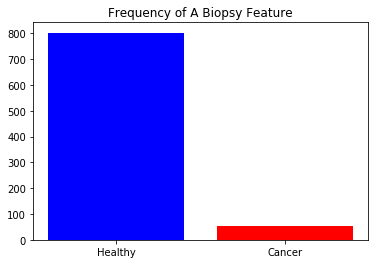

In [5]:
plt.bar(['Healthy','Cancer'],biopsy_cnt, color=['b','r'])
plt.title('Frequency of A Biopsy Feature')
plt.show()

# Preprocessing

I processed train and test set in three steps. This process applied in both the train and the test set.

1. Replace '?' values to None
2. Drop features which missing values are over 15%.
3. Drop missing values

If you want to see this processing code, you can see in my github [code/loaddata.py](https://github.com/TooTouch/WhiteBox-Part2/blob/master/code/loaddata.py).

In [6]:
x_train, y_train = cervical_dataset.transform()
print(f'pre-Train set: {x_train.shape[0]} observations and {x_train.shape[1]} features')

pre-Train set: 668 observations and 30 features


In [14]:
labels, cnts = np.unique(y_train, return_counts=True)
print(f'After preprocessing, A positive class {cnts[1]} and a negative class {cnts[0]}.')

After preprocessing, A positive class 45 and a negative class 623.
